In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from itertools import combinations
from collections import defaultdict

---

In [2]:
df_two_player = pd.read_csv('two-player.csv',index_col=0)
df_two_player["round"] = df_two_player["round"].astype('int')
df_two_player["decision"] = df_two_player["decision"].astype('int')
df_two_player["score"] = df_two_player["score"].astype('int')
df_two_player.tail()

,num_players,treatment,room,threshold,round,player,decision,score
2295,2,only score,123,0.5,48,727967798557118,1,1
2296,2,only score,123,0.5,49,405074693615800,1,1
2297,2,only score,123,0.5,49,727967798557118,0,0
2298,2,only score,123,0.5,50,727967798557118,1,1
2299,2,only score,123,0.5,50,405074693615800,0,0


In [3]:
# Average across rounds
df_aux2 = df_two_player.groupby(['threshold', 'num_players', 'room', 'player'])['decision'].mean().reset_index()
df_aux2.head()

,threshold,num_players,room,player,decision
0,0.5,2,101,405186428721292,0.50
1,0.5,2,101,728608683559397,0.50
2,0.5,2,102,481217814270509,0.64
3,0.5,2,102,752616835913204,0.44
4,0.5,2,103,193508520589663,0.26


In [4]:
dict_datos = defaultdict(list)
for key, grp in df_aux2.groupby(['threshold', 'num_players', 'room']):
    dict_datos['threshold'].append(key[0])    
    dict_datos['num_players'].append(key[1])
    dict_datos['room'].append(key[2])
    dict_datos['go_probs'].append(grp['decision'].to_list())
df = pd.DataFrame(dict_datos)
df.head(10)

,threshold,num_players,room,go_probs
0,0.5,2,101,"[0.5, 0.5]"
1,0.5,2,102,"[0.64, 0.44]"
2,0.5,2,103,"[0.26, 0.96]"
3,0.5,2,104,"[0.82, 0.52]"
4,0.5,2,105,"[0.58, 0.6]"
5,0.5,2,106,"[0.5, 0.5]"
6,0.5,2,107,"[0.4, 0.58]"
7,0.5,2,108,"[0.56, 0.54]"
8,0.5,2,109,"[0.56, 0.58]"
9,0.5,2,110,"[0.48, 0.78]"


In [5]:
df.to_csv('random-two-players-maxlikely.csv', index=True)

In [6]:
# Take only the last 10 rounds
df_aux1 = pd.DataFrame(df_two_player[df_two_player['round'] >= 40])
# Average across rounds
df_aux1 = df_aux1.groupby(['room']) \
    .agg({'score':'mean', 'decision':'mean'}) \
    .reset_index()
df_aux1.head()

,room,score,decision
0,101,0.500000,0.500000
1,102,0.136364,0.500000
2,103,0.363636,0.545455
3,104,0.045455,0.590909
4,105,0.500000,0.500000


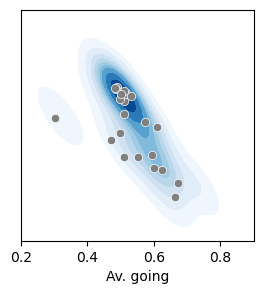

In [7]:
fig, ax = plt.subplots(figsize=(3, 3))
sns.kdeplot(x="decision", y="score", cmap="Blues", fill=True, data=df_aux1)
df_aux_jitter = df_aux1.copy()
df_aux_jitter["decision"] += np.random.normal(0,0.025, len(df_aux_jitter["decision"]))
df_aux_jitter["score"] += np.random.normal(0,0.025, len(df_aux_jitter["score"]))
sns.scatterplot(x='decision', y='score', color="gray", legend=False, data=df_aux_jitter)
plt.xlim(0.2, 0.9)
ax.get_yaxis().set_visible(False)
plt.ylim(-0.6, 1.1)
plt.xlabel('Av. going')
plt.ylabel('Av. score')
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
plt.savefig('kde_going_vs_score_groups.pdf', dpi=300, bbox_inches='tight')

In [8]:
# Take only the last 10 rounds
df_aux = pd.DataFrame(df_two_player[df_two_player['round'] >= 40])
# Average across rounds
df_aux = df_aux.groupby(['treatment', 'room', 'player']) \
    .agg({'score':'mean', 'decision':'mean'}) \
    .reset_index()
df_aux['source'] = 'human'
df_aux.head()

,treatment,room,player,score,decision,source
0,only score,111,408405179210547,0.636364,0.636364,human
1,only score,111,826599327153195,0.363636,0.363636,human
2,only score,112,480199055624757,0.181818,0.545455,human
3,only score,112,691638707567221,0.272727,0.636364,human
4,only score,113,245070533883063,0.636364,0.636364,human


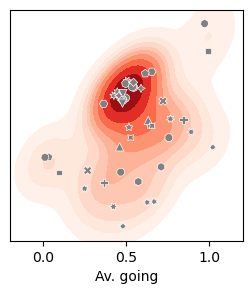

In [9]:
fig, ax = plt.subplots(figsize=(3, 3))
sns.kdeplot(x="decision", y="score", cmap="Reds", fill=True, data=df_aux)
df_aux_jitter = df_aux.copy()
df_aux_jitter["decision"] += np.random.normal(0,0.025, len(df_aux_jitter["decision"]))
df_aux_jitter["score"] += np.random.normal(0,0.025, len(df_aux_jitter["score"]))
sns.scatterplot(x='decision', y='score', color="gray", style="room", legend=False, data=df_aux_jitter)
plt.xlim(-0.2, 1.2)
ax.get_yaxis().set_visible(False)
plt.ylim(-0.6, 1.1)
plt.xlabel('Av. going')
plt.ylabel('Av. score')
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
plt.savefig('kde_going_vs_score.pdf', dpi=300, bbox_inches='tight')

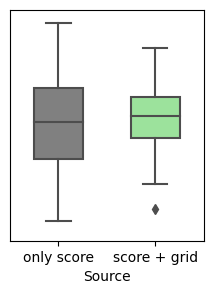

In [10]:
fig, ax = plt.subplots(figsize=(2.5, 3))
sns.boxplot(x='treatment', y='score', width=0.5, palette=['gray', 'lightgreen'], data=df_aux)
ax.get_yaxis().set_visible(False)
plt.ylim(-0.6, 1.1)
plt.xlabel('Source')
plt.ylabel('Av. score')
plt.savefig('boxplot_2p_treatment_vs_score.pdf', dpi=300, bbox_inches='tight')

In [11]:
random_two_player = pd.read_csv('random-two-player.csv')
random_two_player["round"] = random_two_player["round"].astype('int')
random_two_player["decision"] = random_two_player["decision"].astype('int')
random_two_player["score"] = random_two_player["score"].astype('int')
random_two_player["room"] = random_two_player["id_sim"]
random_two_player["player"] = random_two_player["id_player"]
random_two_player["threshold"] = 0.5
random_two_player["treatment"] = None
random_two_player["num_players"] = 2
random_two_player.drop(['id_sim', 'id_player', 'attendance'], axis=1, inplace=True)
random_two_player = random_two_player[['num_players' ,'treatment', 'room', 'threshold', 'round', 'player', 'decision', 'score']]
random_two_player.head()

,num_players,treatment,room,threshold,round,player,decision,score
0,2,None,0c8eb418-da4c-11ee-91da-200b7412e5eb,0.5,0,0,0,0
1,2,None,0c8eb418-da4c-11ee-91da-200b7412e5eb,0.5,0,1,0,0
2,2,None,0c8eb418-da4c-11ee-91da-200b7412e5eb,0.5,1,0,1,1
3,2,None,0c8eb418-da4c-11ee-91da-200b7412e5eb,0.5,1,1,0,0
4,2,None,0c8eb418-da4c-11ee-91da-200b7412e5eb,0.5,2,0,1,-1


In [12]:
# Average across rounds
df_aux_random = random_two_player \
    .groupby(['room', 'player']) \
    .agg({'score':'mean', 'decision':'mean'}) \
    .reset_index()
df_aux_random['source'] = 'Random'
df_aux_random.head(10)

,room,player,score,decision,source
0,0c8eb418-da4c-11ee-91da-200b7412e5eb,0,-0.1,0.7,Random
1,0c8eb418-da4c-11ee-91da-200b7412e5eb,1,-0.3,0.5,Random
2,0c8edae5-da4c-11ee-9528-200b7412e5eb,0,-0.4,0.6,Random
3,0c8edae5-da4c-11ee-9528-200b7412e5eb,1,-0.3,0.7,Random
4,0c8eee6d-da4c-11ee-8819-200b7412e5eb,0,0.0,0.4,Random
5,0c8eee6d-da4c-11ee-8819-200b7412e5eb,1,0.2,0.6,Random
6,0c8f01b5-da4c-11ee-a8f0-200b7412e5eb,0,-0.2,0.4,Random
7,0c8f01b5-da4c-11ee-a8f0-200b7412e5eb,1,-0.1,0.5,Random
8,0c8f151d-da4c-11ee-ab36-200b7412e5eb,0,-0.2,0.4,Random
9,0c8f151d-da4c-11ee-ab36-200b7412e5eb,1,-0.1,0.5,Random


In [13]:
random_two_player_maxlik = pd.read_csv('random-sim-two-players-maxlikely.csv')
random_two_player_maxlik["round"] = random_two_player_maxlik["round"].astype('int')
random_two_player_maxlik["decision"] = random_two_player_maxlik["decision"].astype('int')
random_two_player_maxlik["score"] = random_two_player_maxlik["score"].astype('int')
random_two_player_maxlik["player"] = random_two_player_maxlik["id_player"]
random_two_player_maxlik["threshold"] = 0.5
random_two_player_maxlik["treatment"] = None
random_two_player_maxlik["num_players"] = 2
random_two_player_maxlik.drop(['id_sim', 'id_player', 'attendance'], axis=1, inplace=True)
random_two_player_maxlik = random_two_player_maxlik[['model', 'num_players' ,'treatment', 'room', 'threshold', 'round', 'player', 'decision', 'score']]
random_two_player_maxlik.head()

,model,num_players,treatment,room,threshold,round,player,decision,score
0,mu:0.5; N:2 -- MaxLik,2,None,101,0.5,0,0,0,0
1,mu:0.5; N:2 -- MaxLik,2,None,101,0.5,0,1,0,0
2,mu:0.5; N:2 -- MaxLik,2,None,101,0.5,1,0,0,0
3,mu:0.5; N:2 -- MaxLik,2,None,101,0.5,1,1,1,1
4,mu:0.5; N:2 -- MaxLik,2,None,101,0.5,2,0,1,1


In [14]:
# Average across rounds
df_aux_random_maxlik = random_two_player_maxlik \
    .groupby(['room', 'player']) \
    .agg({'score':'mean', 'decision':'mean'}) \
    .reset_index()
df_aux_random_maxlik['source'] = 'Max_likelihood'
df_aux_random_maxlik.head(10)

,room,player,score,decision,source
0,101,0,0.02,0.48,Max_likelihood
1,101,1,0.02,0.48,Max_likelihood
2,102,0,-0.10,0.66,Max_likelihood
3,102,1,-0.30,0.46,Max_likelihood
4,103,0,-0.31,0.31,Max_likelihood
5,103,1,0.34,0.96,Max_likelihood
6,104,0,-0.08,0.88,Max_likelihood
7,104,1,-0.41,0.55,Max_likelihood
8,105,0,0.05,0.59,Max_likelihood
9,105,1,-0.04,0.50,Max_likelihood


In [15]:
df_both_two_player_maxlik = pd.concat([df_aux, df_aux_random, df_aux_random_maxlik], ignore_index=True)
df_both_two_player_maxlik.head()

,treatment,room,player,score,decision,source
0,only score,111,408405179210547,0.636364,0.636364,human
1,only score,111,826599327153195,0.363636,0.363636,human
2,only score,112,480199055624757,0.181818,0.545455,human
3,only score,112,691638707567221,0.272727,0.636364,human
4,only score,113,245070533883063,0.636364,0.636364,human


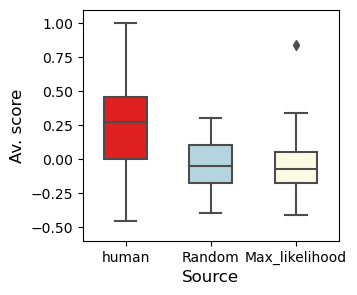

In [16]:
fig, ax = plt.subplots(figsize=(3.3, 3))
sns.boxplot(x='source', y='score', width=0.5, palette=['red', 'lightblue', 'lightyellow'], data=df_both_two_player_maxlik)
plt.ylim(-0.6, 1.1)
plt.xlabel('Source', fontsize='12')
plt.ylabel('Av. score', fontsize='12')
plt.savefig('boxplot_source_vs_score.pdf', dpi=300, bbox_inches='tight')

In [17]:
df_aux['pl'] = df_aux.index
df_aux['pl'] = df_aux.apply(
    lambda x: (x['pl'] % 2) + 1,
    axis = 1
)
df_aux.head()

,treatment,room,player,score,decision,source,pl
0,only score,111,408405179210547,0.636364,0.636364,human,1
1,only score,111,826599327153195,0.363636,0.363636,human,2
2,only score,112,480199055624757,0.181818,0.545455,human,1
3,only score,112,691638707567221,0.272727,0.636364,human,2
4,only score,113,245070533883063,0.636364,0.636364,human,1


In [18]:
X = list()
for key, grp in df_aux.groupby(['pl']):
    data = grp['decision'].to_list()
    X.append(data)

<Axes: >

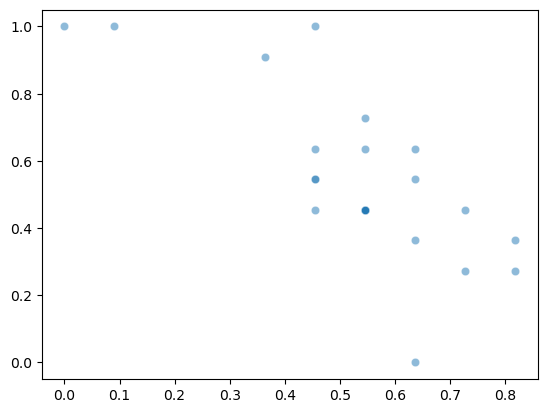

In [19]:
data1 = X[0]
data2 = X[1]
sns.scatterplot(x=data1, y=data2, alpha=0.5)

In [20]:
corr, p = pearsonr(data1, data2)
print("Pearson's correlation: %.3f" % corr)
print('p_val: %.3f' % p)

Pearson's correlation: -0.760
p_val: 0.000


---

---

---

In [21]:
df_multi_player = pd.read_csv('multi-player.csv',index_col=0)
df_multi_player["round"] = df_multi_player["round"].astype('int')
df_multi_player["decision"] = df_multi_player["decision"].astype('int')
df_multi_player["score"] = df_multi_player["score"].astype('int')
df_multi_player.head()

,model,num_players,threshold,threshold_,treatment,room,trial,round,player,decision,score
0,human,4,≈0.25,0.25,upwards,5,1,1,841658927890285,0,0
1,human,4,≈0.25,0.25,upwards,5,1,1,373455036275630,1,-1
2,human,4,≈0.25,0.25,upwards,5,1,1,477327368780915,0,0
3,human,4,≈0.25,0.25,upwards,5,1,1,616876846241757,1,-1
4,human,4,≈0.25,0.25,upwards,5,1,2,841658927890285,1,-1


In [22]:
# Average across rounds
df_aux3 = df_multi_player.groupby(['threshold', 'num_players', 'room', 'player'])['decision'].mean().reset_index()
df_aux3.head()

,threshold,num_players,room,player,decision
0,≈0.25,3,17,406360458182849,0.577778
1,≈0.25,3,17,679877000681823,0.688889
2,≈0.25,3,17,740425726975861,0.600000
3,≈0.25,3,22,284250578854279,0.288889
4,≈0.25,3,22,285258436377517,0.688889


In [23]:
from collections import defaultdict
dict_datos = defaultdict(list)
for key, grp in df_aux3.groupby(['threshold', 'num_players', 'room']):
    dict_datos['threshold'].append(key[0])    
    dict_datos['num_players'].append(key[1])
    dict_datos['room'].append(key[2])
    dict_datos['go_probs'].append(grp['decision'].to_list())
df = pd.DataFrame(dict_datos)
df.head(10)

,threshold,num_players,room,go_probs
0,≈0.25,3,17,"[0.5777777777777777, 0.6888888888888889, 0.6]"
1,≈0.25,3,22,"[0.28888888888888886, 0.6888888888888889, 0.37..."
2,≈0.25,3,24,"[0.6222222222222222, 0.2, 0.7777777777777778]"
3,≈0.25,3,30,"[0.37777777777777777, 0.3333333333333333, 0.35..."
4,≈0.25,3,34,"[0.08888888888888889, 0.24444444444444444, 0.8..."
5,≈0.25,3,41,"[0.6, 0.5333333333333333, 0.4888888888888889]"
6,≈0.25,4,5,"[0.4, 0.3333333333333333, 0.5333333333333333, ..."
7,≈0.25,4,15,"[0.4, 0.43333333333333335, 0.43333333333333335..."
8,≈0.25,4,18,"[0.3448275862068966, 0.3793103448275862, 0.068..."
9,≈0.25,4,25,"[1.0, 0.0, 0.0, 0.0]"


In [24]:
df.to_csv('random-multi-player-maxlikely.csv', index=True)

In [25]:
# Take only the last 10 rounds
df_aux = pd.DataFrame(df_multi_player[df_multi_player['round'] >= 20])
# Average across rounds
df_aux = df_aux.groupby(['num_players', 'treatment', 'threshold', 'trial', 'room', 'player']) \
    .agg({'score':'mean', 'decision':'mean'}) \
    .reset_index()
df_aux['source'] = 'Human'
df_aux.head()

,num_players,treatment,threshold,trial,room,player,score,decision,source
0,3,downwards,≈0.25,2,30,172850836295148,0.125000,0.375000,Human
1,3,downwards,≈0.25,2,30,277565140184927,0.000000,0.375000,Human
2,3,downwards,≈0.25,2,30,670385314115779,0.250000,0.375000,Human
3,3,downwards,≈0.25,3,30,172850836295148,0.310345,0.379310,Human
4,3,downwards,≈0.25,3,30,277565140184927,0.241379,0.310345,Human


In [26]:
from itertools import combinations

df_aux_M = df_aux.copy()
i = 0
correlations = defaultdict(list)
for n, grp in df_aux_M.groupby(['num_players']):
    i += 1
    players = grp['player'].unique()
    X = list()
    Y = list()
    pairs = combinations(players, 2)
    for pair in pairs:
        player = pair[0]
        go_proportion = grp[grp['player'] == player]['decision'].to_list()[0]
        X.append(go_proportion)
        player = pair[1]
        go_proportion = grp[grp['player'] == player]['decision'].to_list()[0]
        Y.append(go_proportion)
    corr, p = pearsonr(X, Y)
    if p < 0.05:
        correlations['corr'].append(corr)
    else:
        correlations['corr'].append(np.nan)
    correlations['num_players'].append(n[0])
df_correlations = pd.DataFrame(correlations)
df_correlations

,corr,num_players
0,NaN,3
1,NaN,4
2,NaN,5
3,NaN,6
4,NaN,7
5,NaN,8
6,NaN,9
7,NaN,11
8,NaN,12


Text(0.5, 0, "Correlation between pairs of players' av. going\n in the same groupsize")

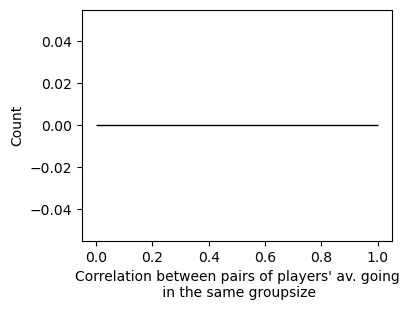

In [27]:
fig, ax = plt.subplots(figsize=(4, 3))
sns.histplot(df_correlations['corr'])
plt.xlabel("Correlation between pairs of players' av. going\n in the same groupsize")

In [55]:
from itertools import combinations

df_aux_M = df_aux.copy()
i = 0
correlations = defaultdict(list)
for n, grp in df_aux_M.groupby(['threshold']):
    i += 1
    players = grp['player'].unique()
    X = list()
    Y = list()
    pairs = combinations(players, 2)
    for pair in pairs:
        player = pair[0]
        go_proportion = grp[grp['player'] == player]['decision'].to_list()[0]
        X.append(go_proportion)
        player = pair[1]
        go_proportion = grp[grp['player'] == player]['decision'].to_list()[0]
        Y.append(go_proportion)
    corr, p = pearsonr(X, Y)
    correlations['threshold'].append(n[0])
    correlations['corr'].append(corr)
df_correlations = pd.DataFrame(correlations)
df_correlations.head()

,threshold,corr
0,≈0.25,-0.007206
1,≈0.5,-0.003371
2,≈0.75,-0.003991


Text(0.5, 0, "Correlation between pairs of players' av. going\n in the same threshold")

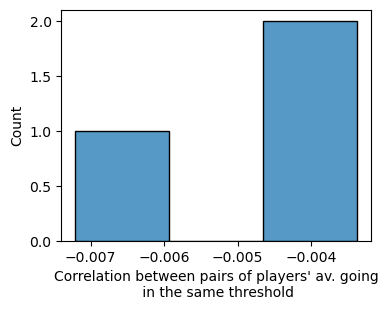

In [56]:
fig, ax = plt.subplots(figsize=(4, 3))
sns.histplot(df_correlations['corr'])
plt.xlabel("Correlation between pairs of players' av. going\n in the same threshold")

<Axes: xlabel='threshold', ylabel='corr'>

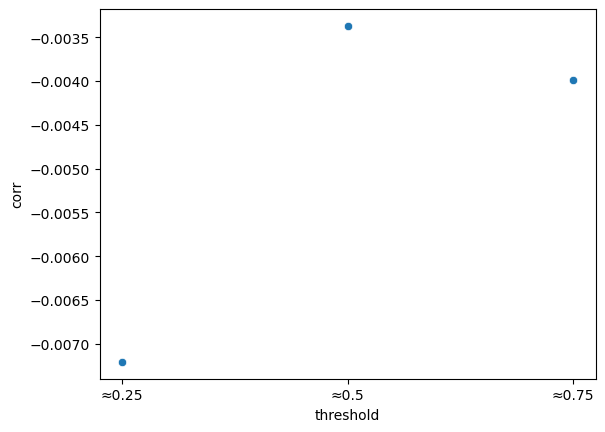

In [58]:
sns.scatterplot(
    x='threshold',
    y='corr',
    data=df_correlations
)

C:\Users\UROSARIO\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


Text(0.5, 0, "Correlation between pairs of players' av. going\n in the same group")

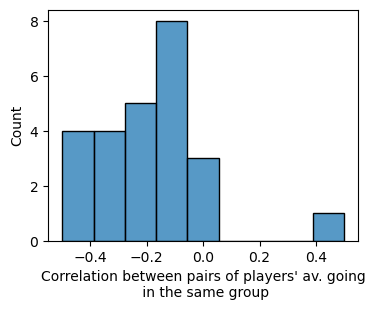

In [26]:
from itertools import combinations

fig, ax = plt.subplots(figsize=(4, 3))
df_aux_M = df_aux.copy()
i = 0
correlations = list()
for n, grp in df_aux_M.groupby(['room']):
    i += 1
    players = grp['player'].unique()
    X = list()
    Y = list()
    pairs = combinations(players, 2)
    for pair in pairs:
        player = pair[0]
        go_proportion = grp[grp['player'] == player]['decision'].to_list()[0]
        X.append(go_proportion)
        player = pair[1]
        go_proportion = grp[grp['player'] == player]['decision'].to_list()[0]
        Y.append(go_proportion)
    corr, p = pearsonr(X, Y)
    correlations.append(corr)
sns.histplot(correlations)
plt.xlabel("Correlation between pairs of players' av. going\n in the same group")

In [19]:
df_aux_M = df_aux.copy()
num_groups = len(df_aux_M['num_players'].unique())
i = 0
X = list()
Y = list()
for n, grp in df_aux_M.groupby(['room']):
    i += 1
    players = grp['player'].unique()
    pairs = combinations(players, 2)
    for pair in pairs:
        player = pair[0]
        go_proportion = grp[grp['player'] == player]['decision'].to_list()[0]
        X.append(go_proportion)
        player = pair[1]
        go_proportion = grp[grp['player'] == player]['decision'].to_list()[0]
        Y.append(go_proportion)
print(X)
print(Y)

[0.45454545454545453, 0.45454545454545453, 0.45454545454545453, 0.2727272727272727, 0.2727272727272727, 0.6363636363636364, 0.4482758620689655, 0.4482758620689655, 0.4482758620689655, 0.4482758620689655, 0.4482758620689655, 0.4482758620689655, 0.4482758620689655, 0.3448275862068966, 0.3448275862068966, 0.3448275862068966, 0.3448275862068966, 0.3448275862068966, 0.3448275862068966, 0.3448275862068966, 0.3448275862068966, 0.3448275862068966, 0.3448275862068966, 0.3448275862068966, 0.5862068965517241, 0.5862068965517241, 0.5862068965517241, 0.5862068965517241, 0.1724137931034483, 0.1724137931034483, 0.1724137931034483, 0.4827586206896552, 0.4827586206896552, 0.3448275862068966, 0.7272727272727273, 0.7272727272727273, 0.7272727272727273, 0.7272727272727273, 0.7272727272727273, 0.7272727272727273, 0.7272727272727273, 0.7272727272727273, 0.7272727272727273, 0.7272727272727273, 0.7272727272727273, 0.6363636363636364, 0.6363636363636364, 0.6363636363636364, 0.6363636363636364, 0.63636363636363

Pearson's correlation: -0.034
p_val: 0.486


<Axes: >

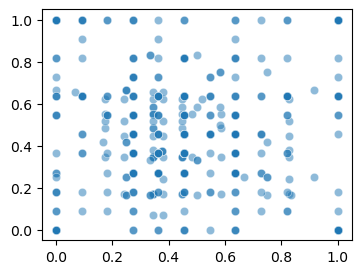

In [21]:
corr, p = pearsonr(X, Y)
print("Pearson's correlation: %.3f" % corr)
print('p_val: %.3f' % p)
#correlations.append(corr)
fig, ax = plt.subplots(figsize=(4, 3))
sns.scatterplot(x=X, y=Y, alpha=0.5)
#plt.xlabel("Correlation between pairs of\n players' av. going\n in the same group")

C:\Users\andra\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


Text(0.5, 0, "Correlation between pairs of\n players' av. going\n in the same groupsize")

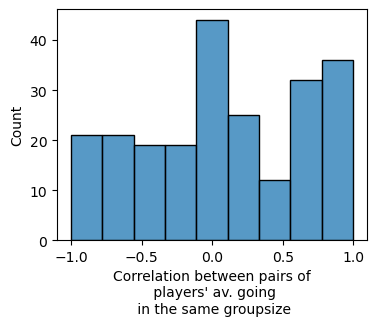

In [116]:
from itertools import combinations

fig, ax = plt.subplots(figsize=(4, 3))
df_aux_M = df_aux.copy()
num_groups = len(df_aux_M['num_players'].unique())
correlations = list()
i = 0
for n, grp_ in df_aux_M.groupby(['num_players']):
    i += 1
    X = list()
    for key, grp in grp_.groupby(['pl']):
        data = grp['decision'].to_list()
        if len(data) > 1:
            X.append(data)
        else:
            break
    if len(X) > 0:
        for pair in combinations(X, 2):
            data1 = pair[0]
            data2 = pair[1]
            corr, p = pearsonr(data1, data2)
            correlations.append(corr)
sns.histplot(correlations)
plt.xlabel("Correlation between pairs of\n players' av. going\n in the same groupsize")

In [53]:
df_aux['pl'] = df_aux.index
df_aux['pl'] = df_aux.apply(
    lambda x: (x['pl'] % x['num_players']) + 1,
    axis = 1
)
df_aux.head()

,num_players,treatment,threshold,trial,room,player,score,decision,source,pl
0,3,downwards,≈0.25,2,30,172850836295148,0.125000,0.375000,Human,1
1,3,downwards,≈0.25,2,30,277565140184927,0.000000,0.375000,Human,2
2,3,downwards,≈0.25,2,30,670385314115779,0.250000,0.375000,Human,3
3,3,downwards,≈0.25,3,30,172850836295148,0.310345,0.379310,Human,1
4,3,downwards,≈0.25,3,30,277565140184927,0.241379,0.310345,Human,2


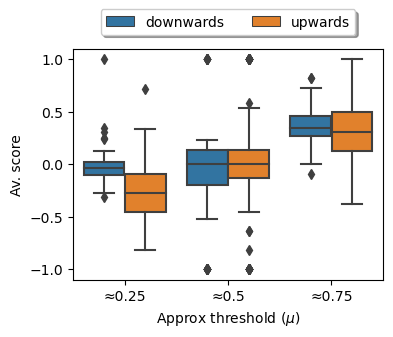

In [31]:
fig, ax = plt.subplots(figsize=(4, 3))
sns.boxplot(
    x='threshold', 
    y='score', 
    hue='treatment', 
    order=['≈0.25', '≈0.5', '≈0.75'],
    data=df_aux, ax=ax
)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=3, fancybox=True, shadow=True)
plt.xlabel('Approx threshold ($\mu$)')
plt.ylabel('Av. score')
plt.savefig('boxplot_threshold_vs_score.pdf', dpi=300, bbox_inches='tight')

In [23]:
random_multi_player = pd.read_csv('random_multi.csv')
random_multi_player["round"] = random_multi_player["round"].astype('int')
random_multi_player["decision"] = random_multi_player["decision"].astype('int')
random_multi_player["score"] = random_multi_player["score"].astype('int')
random_multi_player["room"] = random_multi_player["id_sim"]
random_multi_player["player"] = random_multi_player["id_player"]
random_multi_player["treatment"] = 'Random'
random_multi_player["num_players"] = 2
random_multi_player["threshold"] = pd.cut(
    random_multi_player["threshold"], 
    bins=[0.15, 0.39, 0.65, 1],
    labels=['≈0.25', '≈0.5', '≈0.75']
)
random_multi_player.drop(['id_sim', 'id_player', 'attendance'], axis=1, inplace=True)
random_multi_player = random_multi_player[['num_players' ,'treatment', 'room', 'threshold', 'round', 'player', 'decision', 'score']]
random_multi_player.head()

,num_players,treatment,room,threshold,round,player,decision,score
0,2,Random,a197daca-db21-11ee-bd74-e8b15c3d6336,≈0.25,0,0,0,0
1,2,Random,a197daca-db21-11ee-bd74-e8b15c3d6336,≈0.25,0,1,1,-1
2,2,Random,a197daca-db21-11ee-bd74-e8b15c3d6336,≈0.25,0,2,1,-1
3,2,Random,a197daca-db21-11ee-bd74-e8b15c3d6336,≈0.25,1,0,0,0
4,2,Random,a197daca-db21-11ee-bd74-e8b15c3d6336,≈0.25,1,1,1,-1


In [24]:
# Average across rounds
df_multi_random = random_multi_player \
    .groupby(['num_players', 'threshold', 'room', 'player']) \
    .agg({'score':'mean', 'decision':'mean'}) \
    .reset_index()
df_multi_random['source'] = 'Random'
df_multi_random.head(10)

,num_players,threshold,room,player,score,decision,source
0,2,≈0.25,a197daca-db21-11ee-bd74-e8b15c3d6336,0,-0.333333,0.333333,Random
1,2,≈0.25,a197daca-db21-11ee-bd74-e8b15c3d6336,1,-0.533333,0.533333,Random
2,2,≈0.25,a197daca-db21-11ee-bd74-e8b15c3d6336,2,-0.300000,0.300000,Random
3,2,≈0.25,a197daca-db21-11ee-bd74-e8b15c3d6336,3,NaN,NaN,Random
4,2,≈0.25,a197daca-db21-11ee-bd74-e8b15c3d6336,4,NaN,NaN,Random
5,2,≈0.25,a197daca-db21-11ee-bd74-e8b15c3d6336,5,NaN,NaN,Random
6,2,≈0.25,a197daca-db21-11ee-bd74-e8b15c3d6336,6,NaN,NaN,Random
7,2,≈0.25,a197daca-db21-11ee-bd74-e8b15c3d6336,7,NaN,NaN,Random
8,2,≈0.25,a197daca-db21-11ee-bd74-e8b15c3d6336,8,NaN,NaN,Random
9,2,≈0.25,a197daca-db21-11ee-bd74-e8b15c3d6336,9,NaN,NaN,Random


In [25]:
random_multi_player_maxlik = pd.read_csv('random-sim-multi-player-maxlikely.csv')
random_multi_player_maxlik.head()

,id_sim,round,attendance,id_player,decision,score,model,room,threshold,num_players,treatment,trial
0,ca473c5a-dbeb-11ee-9805-e8b15c3d6336,0,"[0, 1, 1]",0,0,0,mu:0.25; N:3 -- MaxLik,17,0.25,3,simulation,1
1,ca473c5a-dbeb-11ee-9805-e8b15c3d6336,0,"[0, 1, 1]",1,1,-1,mu:0.25; N:3 -- MaxLik,17,0.25,3,simulation,1
2,ca473c5a-dbeb-11ee-9805-e8b15c3d6336,0,"[0, 1, 1]",2,1,-1,mu:0.25; N:3 -- MaxLik,17,0.25,3,simulation,1
3,ca473c5a-dbeb-11ee-9805-e8b15c3d6336,1,"[0, 1, 1]",0,0,0,mu:0.25; N:3 -- MaxLik,17,0.25,3,simulation,1
4,ca473c5a-dbeb-11ee-9805-e8b15c3d6336,1,"[0, 1, 1]",1,1,-1,mu:0.25; N:3 -- MaxLik,17,0.25,3,simulation,1


In [26]:
random_multi_player_maxlik = pd.read_csv('random-sim-multi-player-maxlikely.csv')
random_multi_player_maxlik["round"] = random_multi_player_maxlik["round"].astype('int')
random_multi_player_maxlik["decision"] = random_multi_player_maxlik["decision"].astype('int')
random_multi_player_maxlik["score"] = random_multi_player_maxlik["score"].astype('int')
random_multi_player_maxlik["room"] = random_multi_player_maxlik["id_sim"]
random_multi_player_maxlik["player"] = random_multi_player_maxlik["id_player"]
random_multi_player_maxlik["treatment"] = 'Max_likelihood'
random_multi_player_maxlik["num_players"] = 2
random_multi_player_maxlik["threshold"] = pd.cut(
    random_multi_player_maxlik["threshold"], 
    bins=[0.15, 0.39, 0.65, 1],
    labels=['≈0.25', '≈0.5', '≈0.75']
)
random_multi_player_maxlik.drop(['id_sim', 'id_player', 'attendance'], axis=1, inplace=True)
random_multi_player_maxlik = random_multi_player_maxlik[['num_players' ,'treatment', 'room', 'threshold', 'round', 'player', 'decision', 'score']]
random_multi_player_maxlik.head()

,num_players,treatment,room,threshold,round,player,decision,score
0,2,Max_likelihood,ca473c5a-dbeb-11ee-9805-e8b15c3d6336,≈0.25,0,0,0,0
1,2,Max_likelihood,ca473c5a-dbeb-11ee-9805-e8b15c3d6336,≈0.25,0,1,1,-1
2,2,Max_likelihood,ca473c5a-dbeb-11ee-9805-e8b15c3d6336,≈0.25,0,2,1,-1
3,2,Max_likelihood,ca473c5a-dbeb-11ee-9805-e8b15c3d6336,≈0.25,1,0,0,0
4,2,Max_likelihood,ca473c5a-dbeb-11ee-9805-e8b15c3d6336,≈0.25,1,1,1,-1


In [27]:
# Average across rounds
df_multi_random_maxlik = random_multi_player_maxlik \
    .groupby(['num_players', 'threshold', 'room', 'player']) \
    .agg({'score':'mean', 'decision':'mean'}) \
    .reset_index()
df_multi_random_maxlik['source'] = 'Max_likelihood'
df_multi_random_maxlik.head(10)

,num_players,threshold,room,player,score,decision,source
0,2,≈0.25,ca473c5a-dbeb-11ee-9805-e8b15c3d6336,0,-0.4,0.4,Max_likelihood
1,2,≈0.25,ca473c5a-dbeb-11ee-9805-e8b15c3d6336,1,-0.8,0.8,Max_likelihood
2,2,≈0.25,ca473c5a-dbeb-11ee-9805-e8b15c3d6336,2,-0.5,0.5,Max_likelihood
3,2,≈0.25,ca473c5a-dbeb-11ee-9805-e8b15c3d6336,3,NaN,NaN,Max_likelihood
4,2,≈0.25,ca473c5a-dbeb-11ee-9805-e8b15c3d6336,4,NaN,NaN,Max_likelihood
5,2,≈0.25,ca473c5a-dbeb-11ee-9805-e8b15c3d6336,5,NaN,NaN,Max_likelihood
6,2,≈0.25,ca473c5a-dbeb-11ee-9805-e8b15c3d6336,6,NaN,NaN,Max_likelihood
7,2,≈0.25,ca473c5a-dbeb-11ee-9805-e8b15c3d6336,7,NaN,NaN,Max_likelihood
8,2,≈0.25,ca473c5a-dbeb-11ee-9805-e8b15c3d6336,8,NaN,NaN,Max_likelihood
9,2,≈0.25,ca473c5a-dbeb-11ee-9805-e8b15c3d6336,9,NaN,NaN,Max_likelihood


In [28]:
df_both_multi_player_maxlik = pd.concat([df_aux, df_multi_random, df_multi_random_maxlik], ignore_index=True)
df_both_multi_player_maxlik.head()

,num_players,treatment,threshold,trial,room,player,score,decision,source
0,3,downwards,≈0.25,2.0,30,172850836295148,0.125000,0.375000,Human
1,3,downwards,≈0.25,2.0,30,277565140184927,0.000000,0.375000,Human
2,3,downwards,≈0.25,2.0,30,670385314115779,0.250000,0.375000,Human
3,3,downwards,≈0.25,3.0,30,172850836295148,0.310345,0.379310,Human
4,3,downwards,≈0.25,3.0,30,277565140184927,0.241379,0.310345,Human


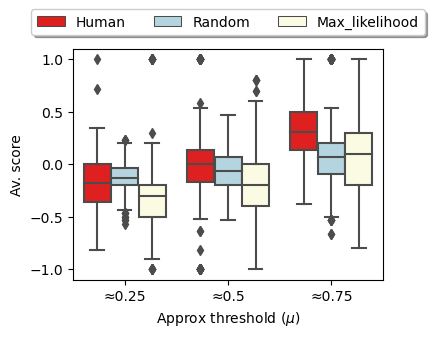

In [30]:
fig, ax = plt.subplots(figsize=(4, 3))
sns.boxplot(
    x='threshold', 
    y='score', 
    hue='source', 
    order=['≈0.25', '≈0.5', '≈0.75'],
    palette=['red', 'lightblue', 'lightyellow'], 
    data=df_both_multi_player_maxlik, ax=ax
)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=3, fancybox=True, shadow=True)
plt.xlabel('Approx threshold ($\mu$)')
plt.ylabel('Av. score')
plt.savefig('boxplot_threshold_vs_score_random.pdf', dpi=300, bbox_inches='tight')

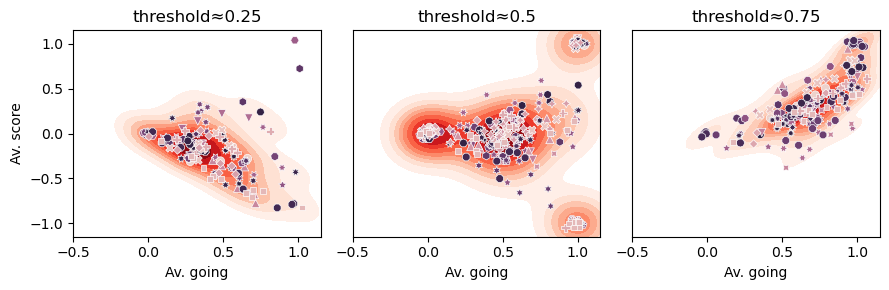

In [63]:
thresholds = df_aux["threshold"].unique().tolist()
thresholds = sorted(thresholds)

fig = plt.figure(
    figsize=(9,3),
    tight_layout=True
)

for i, threshold in enumerate(thresholds):
    df = pd.DataFrame(df_aux[df_aux["threshold"] == threshold])
    ax = fig.add_subplot(1, len(thresholds), i+1)
    sns.kdeplot(x="decision", y="score", cmap="Reds", fill=True, data=df)
    df_jitter = df.copy()
    df_jitter["decision"] += np.random.normal(0,0.025, len(df_jitter["decision"]))
    df_jitter["score"] += np.random.normal(0,0.025, len(df_jitter["score"]))
    sns.scatterplot(x='decision', y='score', hue='room', style='room', legend=False, data=df_jitter)
    ax.set_xlim([-.5, 1.15])
    ax.set_ylim([-1.15, 1.15])
    ax.set_title(f'threshold{threshold}')
    ax.set_xlabel('Av. going')
    ax.set_ylabel('Av. score')
    if 0 < i < len(thresholds):
        ax.get_yaxis().set_visible(False)
    
plt.savefig('grid_kde_going_vs_score.pdf', dpi=300)

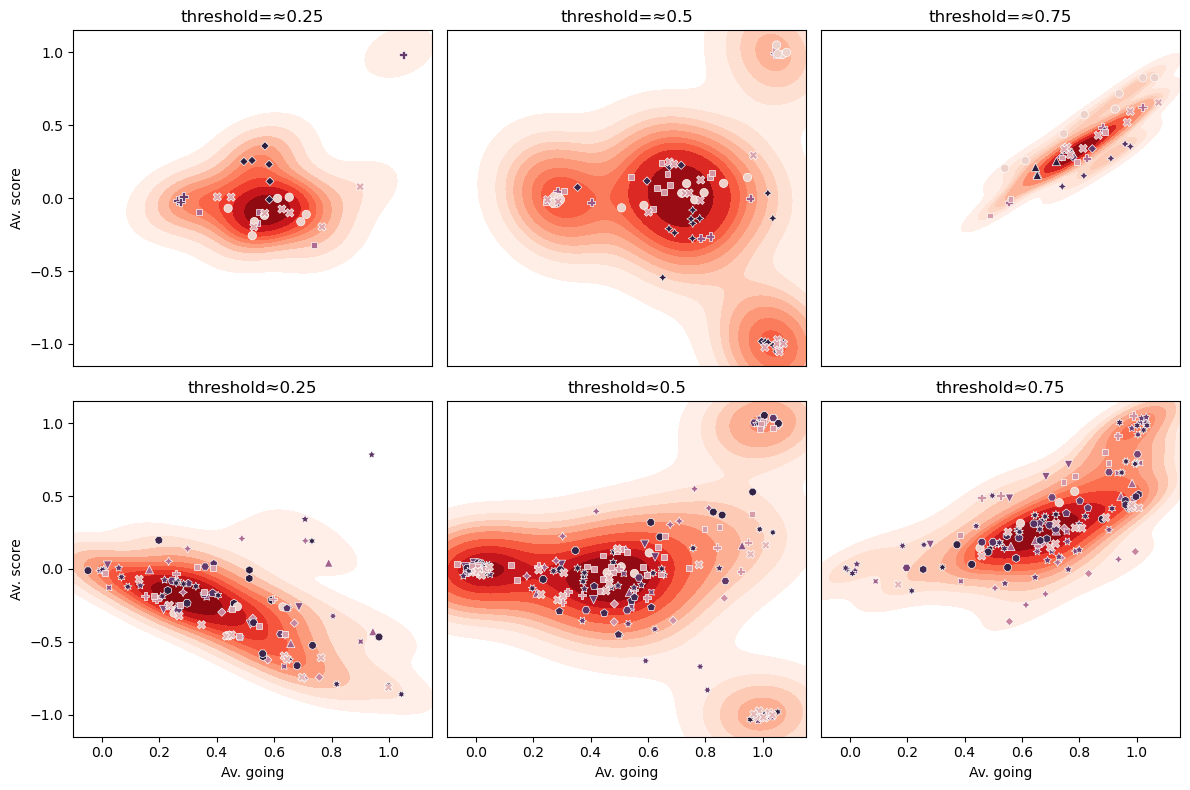

In [56]:
thresholds = df_aux["threshold"].unique().tolist()
thresholds = sorted(thresholds)

fig = plt.figure(
    figsize=(12,8),
    tight_layout=True
)

for i, threshold in enumerate(thresholds):
    df = pd.DataFrame(df_aux[df_aux["threshold"] == threshold])
    df = pd.DataFrame(df[df["treatment"] == 'downwards'])
    ax = fig.add_subplot(2, len(thresholds), i+1)
    sns.kdeplot(x="decision", y="score", cmap="Reds", fill=True, data=df)
    df_jitter = df.copy()
    df_jitter["decision"] += np.random.normal(0,0.025, len(df_jitter["decision"]))
    df_jitter["score"] += np.random.normal(0,0.025, len(df_jitter["score"]))
    sns.scatterplot(x='decision', y='score', hue='room', style='room', legend=False, data=df_jitter)
    ax.set_xlim([-.5, 1.15])
    ax.set_ylim([-1.15, 1.15])
    ax.set_title(f'threshold={threshold}')
    ax.set_xlabel('Av. going')
    ax.set_ylabel('Av. score')
    ax.get_xaxis().set_visible(False)
    if 0 < i < len(thresholds):
        ax.get_yaxis().set_visible(False)
    df = pd.DataFrame(df_aux[df_aux["threshold"] == threshold])
    df = pd.DataFrame(df[df["treatment"] == 'upwards'])
    ax = fig.add_subplot(2, len(thresholds), i+1+len(thresholds))
    sns.kdeplot(x="decision", y="score", cmap="Reds", fill=True, data=df)
    df_jitter = df.copy()
    df_jitter["decision"] += np.random.normal(0,0.025, len(df_jitter["decision"]))
    df_jitter["score"] += np.random.normal(0,0.025, len(df_jitter["score"]))
    sns.scatterplot(x='decision', y='score', hue='room', style='room', legend=False, data=df_jitter)
    ax.set_xlim([-.1, 1.15])
    ax.set_ylim([-1.15, 1.15])
    ax.set_title(f'threshold{threshold}')
    ax.set_xlabel('Av. going')
    ax.set_ylabel('Av. score')
    if 0 < i < len(thresholds):
        ax.get_yaxis().set_visible(False)

In [58]:
# Take only the last 10 rounds
df_aux1 = pd.DataFrame(df_multi_player[df_multi_player['round'] >= 20])
# Average across rounds
df_aux1 = df_aux1.groupby(['num_players', 'treatment', 'threshold', 'trial', 'room']) \
    .agg({'score':'mean', 'decision':'mean'}) \
    .reset_index()
#df_aux1

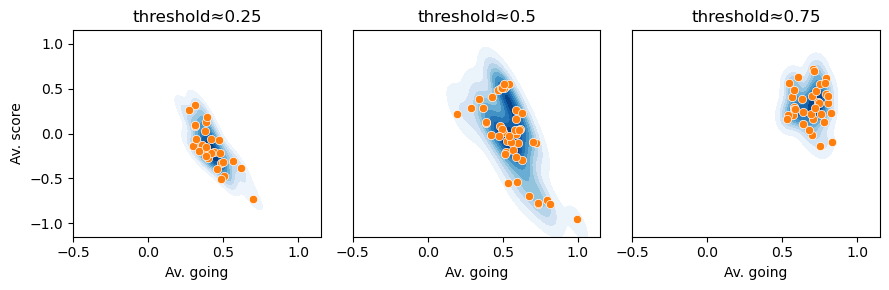

In [64]:
thresholds = df_aux1["threshold"].unique().tolist()
thresholds = sorted(thresholds)

fig = plt.figure(
    figsize=(9,3),
    tight_layout=True
)

for i, threshold in enumerate(thresholds):
    df = pd.DataFrame(df_aux1[df_aux1["threshold"] == threshold])
    ax = fig.add_subplot(1, len(thresholds), i+1)
    sns.kdeplot(x="decision", y="score", cmap="Blues", fill=True, data=df)
    df_jitter = df.copy()
    df_jitter["decision"] += np.random.normal(0,0.025, len(df_jitter["decision"]))
    df_jitter["score"] += np.random.normal(0,0.025, len(df_jitter["score"]))
    sns.scatterplot(x='decision', y='score', legend=False, data=df_jitter)
    ax.set_xlim([-.5, 1.15])
    ax.set_ylim([-1.15, 1.15])
    ax.set_title(f'threshold≈{threshold}')
    ax.set_xlabel('Av. going')
    ax.set_ylabel('Av. score')
    if 0 < i < len(thresholds):
        ax.get_yaxis().set_visible(False)

plt.savefig('grid_kde_going_vs_score_groups.pdf', dpi=300)

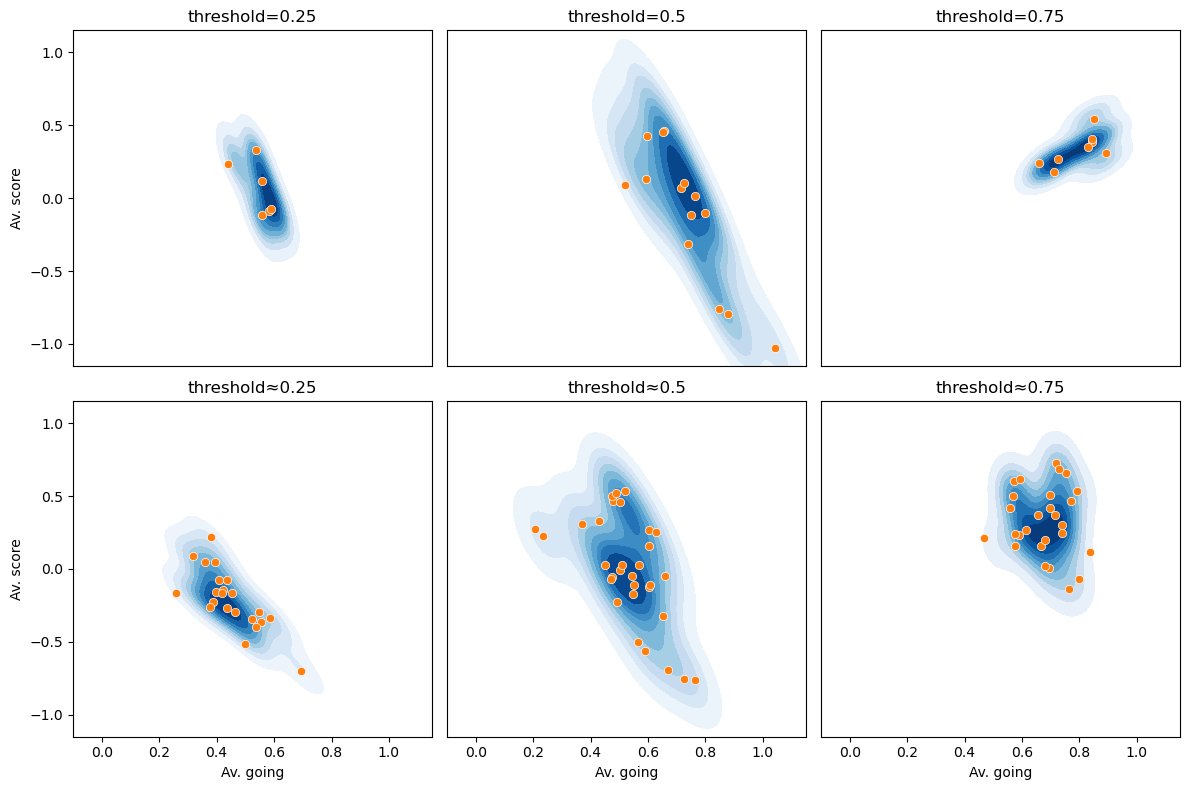

In [62]:
thresholds = df_aux1["threshold"].unique().tolist()
thresholds = sorted(thresholds)

fig = plt.figure(
    figsize=(12,8),
    tight_layout=True
)

for i, threshold in enumerate(thresholds):
    df = pd.DataFrame(df_aux1[df_aux1["threshold"] == threshold])
    df = pd.DataFrame(df[df["treatment"] == 'downwards'])
    ax = fig.add_subplot(2, len(thresholds), i+1)
    sns.kdeplot(x="decision", y="score", cmap="Blues", fill=True, data=df)
    df_jitter = df.copy()
    df_jitter["decision"] += np.random.normal(0,0.025, len(df_jitter["decision"]))
    df_jitter["score"] += np.random.normal(0,0.025, len(df_jitter["score"]))
    sns.scatterplot(x='decision', y='score', legend=False, data=df_jitter)
    ax.set_xlim([-.5, 1.15])
    ax.set_ylim([-1.15, 1.15])
    ax.set_title(f'threshold={threshold}')
    ax.set_xlabel('Av. going')
    ax.set_ylabel('Av. score')
    ax.get_xaxis().set_visible(False)
    if 0 < i < len(thresholds):
        ax.get_yaxis().set_visible(False)
    df = pd.DataFrame(df_aux1[df_aux1["threshold"] == threshold])
    df = pd.DataFrame(df[df["treatment"] == 'upwards'])
    ax = fig.add_subplot(2, len(thresholds), i+1+len(thresholds))
    sns.kdeplot(x="decision", y="score", cmap="Blues", fill=True, data=df)
    df_jitter = df.copy()
    df_jitter["decision"] += np.random.normal(0,0.025, len(df_jitter["decision"]))
    df_jitter["score"] += np.random.normal(0,0.025, len(df_jitter["score"]))
    sns.scatterplot(x='decision', y='score', legend=False, data=df_jitter)
    ax.set_xlim([-.1, 1.15])
    ax.set_ylim([-1.15, 1.15])
    ax.set_title(f'threshold≈{threshold}')
    ax.set_xlabel('Av. going')
    ax.set_ylabel('Av. score')
    if 0 < i < len(thresholds):
        ax.get_yaxis().set_visible(False)